# Imports, files & options

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
plt.style.use('Solarize_Light2')

In [49]:
df_train = pd.read_csv('data/raw/titanic_kaggle_train.csv')
df_test = pd.read_csv('data/raw/titanic_kaggle_test.csv')

# Data preparation

## Basic info

In [50]:
df_train.shape

(891, 12)

In [51]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [53]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df_train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Spliting the 'Name' column


In [56]:
df_train['Name']

0                                  Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Thayer)
2                                   Heikkinen, Miss. Laina
3             Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                 Allen, Mr. William Henry
                              ...                         
886                                  Montvila, Rev. Juozas
887                           Graham, Miss. Margaret Edith
888               Johnston, Miss. Catherine Helen "Carrie"
889                                  Behr, Mr. Karl Howell
890                                    Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [57]:
df_train[['LastName', 'FirstName']] = df_train['Name'].str.split(', ', expand=True)
df_test[['LastName', 'FirstName']] = df_test['Name'].str.split(', ', expand=True)

In [58]:
df_train[['NamePrefix', 'FirstName']] = df_train['FirstName'].str.split('\. ', n=1, expand=True)
df_test[['NamePrefix', 'FirstName']] = df_test['FirstName'].str.split('\. ', n=1, expand=True)

## Checking for duplicates

In [59]:
df_train.loc[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,NamePrefix


In [60]:
df_train.loc[df_train.duplicated(subset=['FirstName', 'LastName'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,NamePrefix


In [61]:
df_test.loc[df_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,NamePrefix


In [62]:
df_test.loc[df_test.duplicated(subset=['FirstName', 'LastName'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,NamePrefix


## Understanding features

### Dataset balance

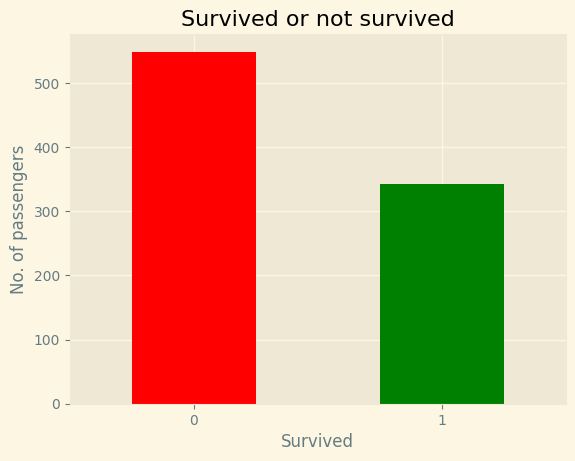

In [63]:
ax_survived = df_train['Survived'].value_counts() \
                            .plot(kind='bar', title='Survived or not survived',
                                  color=['red', 'green'])
ax_survived.set_xlabel('Survived')
ax_survived.set_ylabel('No. of passengers')
ax_survived.set_xticklabels(ax_survived.get_xticklabels(), rotation=0)
plt.show()

The above example shows that the dataset is imbalanced.

Such cases can be handled using e.g. weighted loss.

### Sex

In [64]:
df_train['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

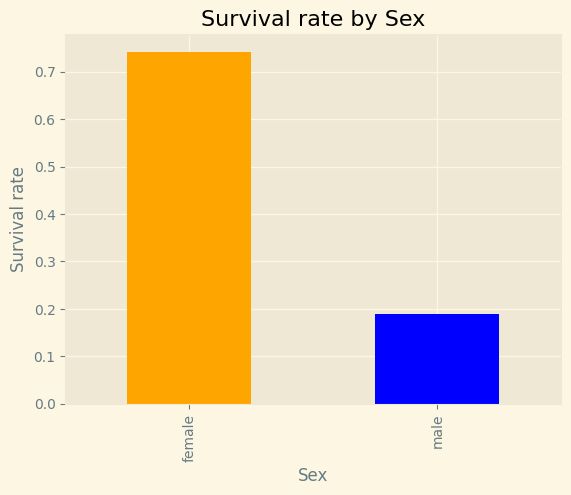

In [65]:
ax_sex_survived = df_train.groupby('Sex')['Survived'] \
        .mean() \
        .sort_values(ascending=False) \
        .plot(kind='bar', color=['orange', 'blue'], title='Survival rate by Sex')
ax_sex_survived.set_ylabel('Survival rate')
plt.show()

### Pclass

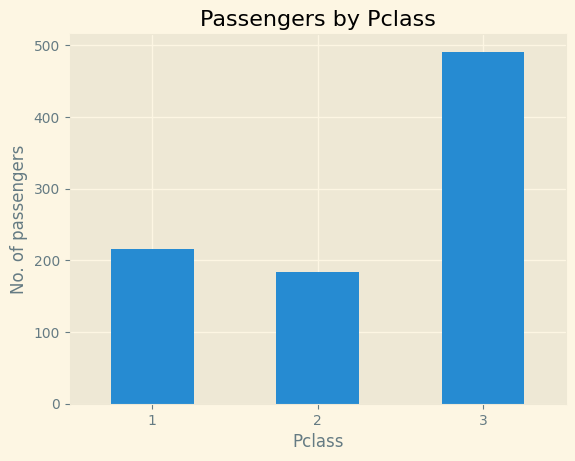

In [66]:
ax_pclass = df_train['Pclass'].value_counts() \
                 .sort_index() \
                 .plot(kind='bar', title='Passengers by Pclass')
ax_pclass.set_xlabel('Pclass')
ax_pclass.set_ylabel('No. of passengers')
ax_pclass.set_xticklabels(ax_pclass.get_xticklabels(), rotation=0)
plt.show()

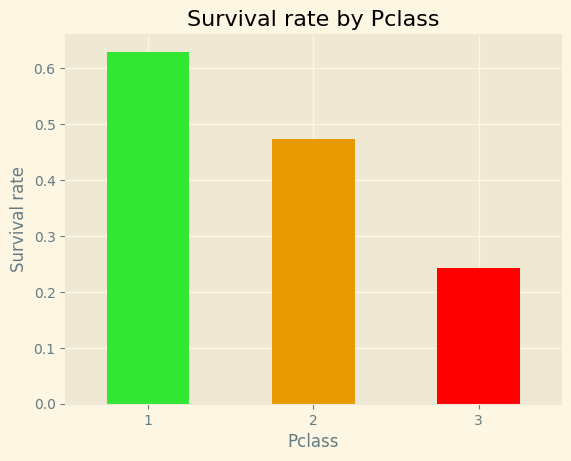

In [67]:
ax_pclass_survived = df_train.groupby('Pclass')['Survived'] \
                       .mean() \
                       .plot(kind='bar', title='Survival rate by Pclass',
                             color=[(0.2, 0.9, 0.2), (0.9, 0.6, 0), (1, 0, 0)])
ax_pclass_survived.set_ylabel('Survival rate')
ax_pclass_survived.set_xticklabels(ax_pclass_survived.get_xticklabels(), rotation=0)
plt.show()

### Embarked

In [68]:
df_train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

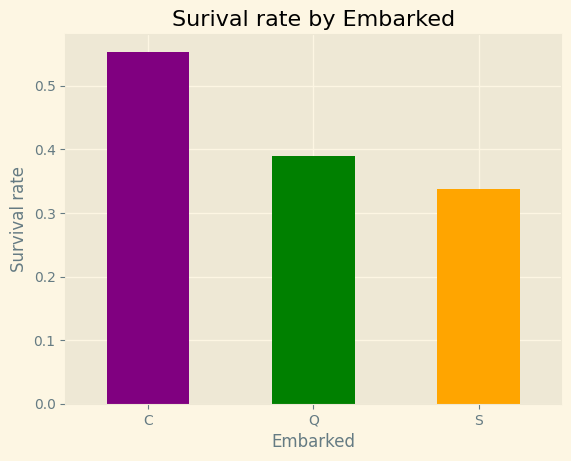

In [69]:
ax_embarked_survived = df_train.groupby('Embarked')['Survived'] \
        .mean() \
        .plot(kind='bar', title='Surival rate by Embarked',
              color=['purple', 'green', 'orange'])
ax_embarked_survived.set_ylabel('Survival rate')
ax_embarked_survived.set_xticklabels(ax_embarked_survived.get_xticklabels(), rotation=0)
plt.show()

### Age

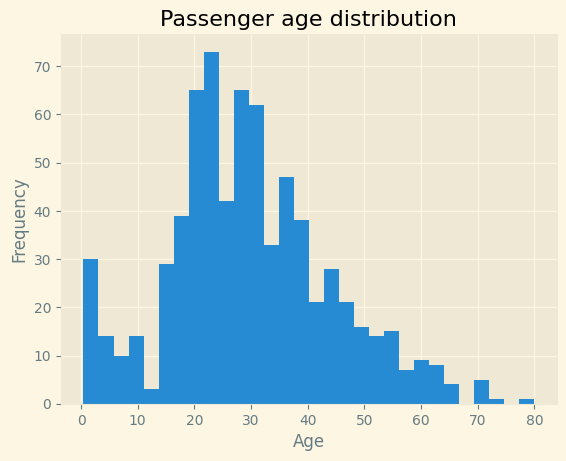

In [70]:
ax_age = df_train['Age'].plot(kind='hist', bins=30, title='Passenger age distribution')
ax_age.set_xlabel('Age')
plt.show()

### SibSp

In [71]:
df_train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

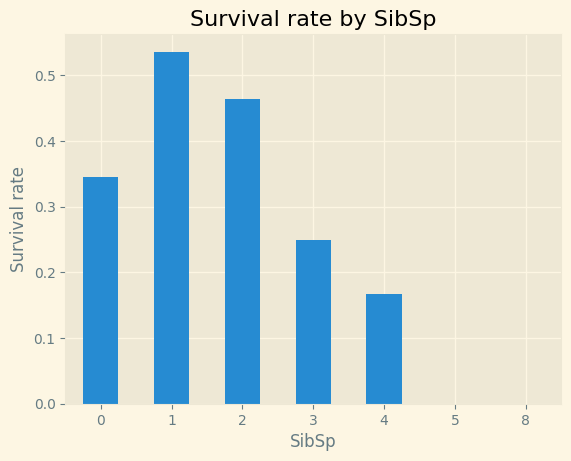

In [72]:
ax_sibsp_survived = df_train.groupby('SibSp')['Survived'] \
                            .mean() \
                            .plot(kind='bar', title='Survival rate by SibSp')
ax_sibsp_survived.set_ylabel('Survival rate')
ax_sibsp_survived.set_xticklabels(ax_sibsp_survived.get_xticklabels(), rotation=0)
plt.show()

Parch

In [73]:
df_train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

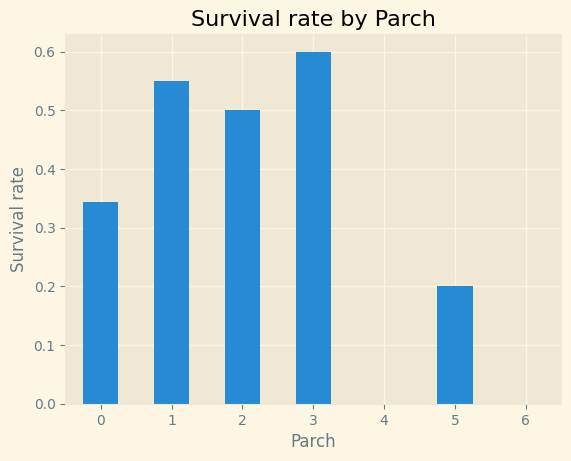

In [74]:
ax_parch_survived = df_train.groupby('Parch')['Survived'] \
                            .mean() \
                            .plot(kind='bar', title='Survival rate by Parch')
ax_parch_survived.set_ylabel('Survival rate')
ax_parch_survived.set_xticklabels(ax_parch_survived.get_xticklabels(), rotation=0)
plt.show()

### Fare

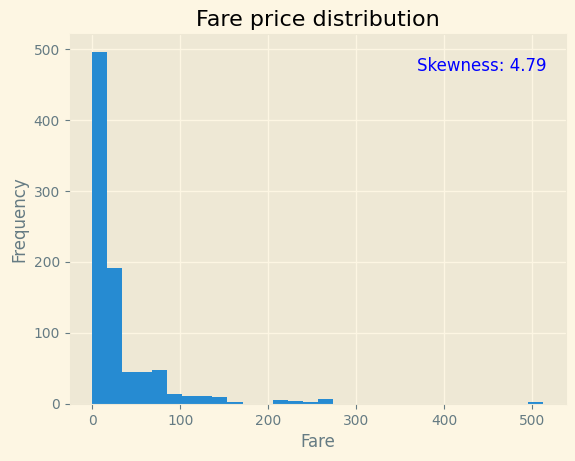

In [75]:
ax_fare = df_train['Fare'].plot(kind='hist', bins=30, title='Fare price distribution')
ax_fare.set_xlabel('Fare')

skewness = df_train['Fare'].skew()
ax_fare.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='blue')

plt.show()

### Average age in various categories

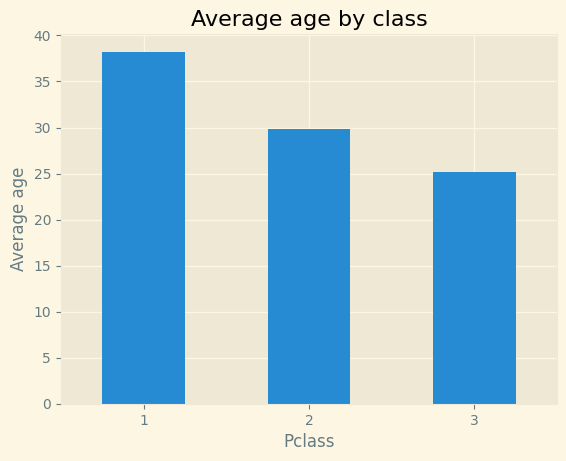

In [76]:
ax_pclass_survived = df_train.groupby('Pclass')['Age'] \
                       .mean() \
                       .plot(kind='bar', title='Average age by class')
ax_pclass_survived.set_ylabel('Average age')
ax_pclass_survived.set_xticklabels(ax_pclass_survived.get_xticklabels(), rotation=0)
plt.show()

In [77]:
df_train[['PassengerId', 'NamePrefix']].groupby('NamePrefix', as_index=False) \
                                       .count() \
                                       .sort_values(by='PassengerId', ascending=False) \
                                       .reset_index(drop=True) \
                                       .rename(columns={'PassengerId': 'Count'})

,NamePrefix,Count
0,Mr,517
1,Miss,182
2,Mrs,125
3,Master,40
4,Dr,7
5,Rev,6
6,Major,2
7,Col,2
8,Mlle,2
9,Sir,1


In [78]:
df_train['Age'].isnull().groupby(df_train['NamePrefix']).sum().sort_values(ascending=False).reset_index(name='NaNs in Age column')

,NamePrefix,NaNs in Age column
0,Mr,119
1,Miss,36
2,Mrs,17
3,Master,4
4,Dr,1
5,Mme,0
6,Sir,0
7,Rev,0
8,Ms,0
9,Capt,0


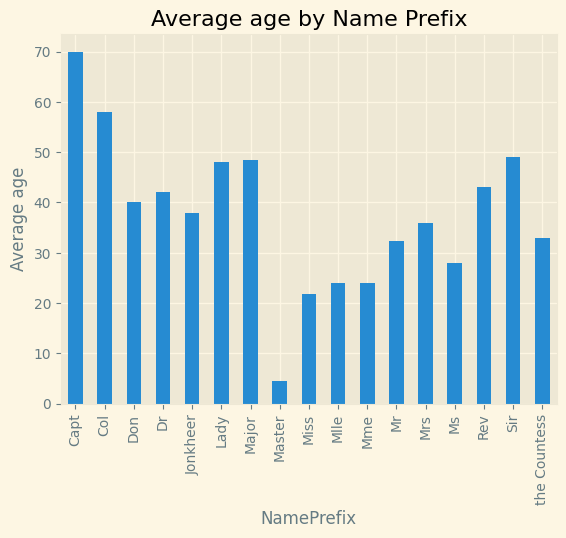

In [79]:
ax_pclass_survived = df_train.groupby('NamePrefix')['Age'] \
                       .mean() \
                       .plot(kind='bar', title='Average age by Name Prefix')
ax_pclass_survived.set_ylabel('Average age')
plt.show()

## Dropping useless columns

In [80]:
df_train = df_train.drop(columns=['Ticket', 'Cabin', 'FirstName', 'LastName', 'PassengerId', 'Name'], axis=1)
df_test = df_test.drop(columns=['Ticket', 'Cabin', 'FirstName', 'LastName', 'Name'], axis=1)

## Filling empty cells

Filling empty Age cells with average age by NamePrefix:

In [81]:
df_train['Age'] = df_train['Age'].fillna(df_train.groupby('NamePrefix')['Age'].transform('mean'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby('NamePrefix')['Age'].transform('mean'))

Filling empty Emparked cells with the most popular value

In [82]:
embarked_mode = df_train['Embarked'].dropna().mode()[0]
df_train['Embarked'].fillna(embarked_mode, inplace=True)

Filling empty Fare cells with the median value

In [83]:
fare_median = df_test['Fare'].dropna().median()
df_test['Fare'].fillna(fare_median, inplace = True)

In [84]:
# Interestingly, there still remains a NaN value in one of the Age cells
df_test['Age'].isnull().sum()

1

In [85]:
df_test = df_test.dropna()

## Applying log transformation to Fare

In [86]:
df_train['Fare'] = df_train['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

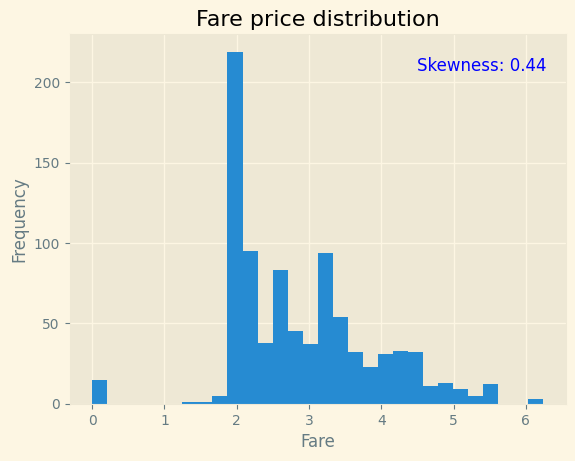

In [87]:
ax_fare = df_train['Fare'].plot(kind='hist', bins=30, title='Fare price distribution')
ax_fare.set_xlabel('Fare')

skewness = df_train['Fare'].skew()
ax_fare.annotate(f'Skewness: {skewness:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='blue')

plt.show()

## Reordering columns

In [88]:
reordered_col_list = ['Survived', 'Pclass', 'NamePrefix',
                      'Sex', 'Age', 'SibSp', 'Parch',
                      'Fare','Embarked']
df_train = df_train[reordered_col_list]

## Feature engineering

### Creating IsAlone feature

In [89]:
df_train['IsAlone'] = 0
df_train.loc[df_train['Parch'] + df_train['SibSp'] == 0, 'IsAlone'] = 1
df_test['IsAlone'] = 0
df_test.loc[df_test['Parch'] + df_test['SibSp'] == 0, 'IsAlone'] = 1

In [90]:
df_train.head()

,Survived,Pclass,NamePrefix,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,Mr,male,22.0,1,0,1.981001,S,0
1,1,1,Mrs,female,38.0,1,0,4.266662,C,0
2,1,3,Miss,female,26.0,0,0,2.070022,S,1
3,1,1,Mrs,female,35.0,1,0,3.972177,S,0
4,0,3,Mr,male,35.0,0,0,2.085672,S,1


## Feature encoding

In [91]:
# Convert 'male' to 0 and 'female' to 1 in the Sex column

df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})

In [92]:
# Simplify title

df_train['NamePrefix'] = df_train['NamePrefix'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
df_train['NamePrefix'] = df_train['NamePrefix'].replace(['Mlle', 'Ms'], 'Miss')
df_train['NamePrefix'] = df_train['NamePrefix'].replace('Mme', 'Mrs')

df_test['NamePrefix'] = df_test['NamePrefix'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
df_test['NamePrefix'] = df_test['NamePrefix'].replace(['Mlle', 'Ms'], 'Miss')
df_test['NamePrefix'] = df_test['NamePrefix'].replace('Mme', 'Mrs')

In [93]:
# Encode NamePrefix and Embarked

df_train = pd.get_dummies(df_train, columns = ['NamePrefix'], prefix='NPref', dtype=int)
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Em', dtype=int)

df_test = pd.get_dummies(df_test, columns = ['NamePrefix'], prefix='NPref', dtype=int)
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Em', dtype=int)

## Saving the dataset

In [94]:
X_train = df_train.drop('Survived', axis=1).copy()
y_train = df_train['Survived'].copy()
X_test = df_test.drop('PassengerId', axis=1).copy()

X_train.to_csv('data/processed/X_train.csv', index=False)
y_train.to_csv('data/processed/y_train.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)